# Regression
In this file, I will calculate the coefficient $\beta$ for different stocks. We will define $y$ as the stock and $X$ as the reference index. The coefficient $\beta$ represents the expected percent change in the stock (y) for each unit (percent) change in the reference index (X).
$\hat{\beta}$ is the parameter that minimizes $argmin(y-\hat{y}) = argmin(y-\beta \cdot x) = argmin(||y-XB||^2)$. Therefore, the estimated value of $\beta$ can be calculated as $\hat{\beta} = (X^TX)^{-1}X^TY$.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as datetime
import numpy as np
import statsmodels.api as sm

In [3]:

def adjust(stock,start='2022-01-01'):
    """
    A function that gets the input: name of the stock and period.
    The function returns a DataFrame (df) containing the close prices of the stock.

    Parameters:
        stock (str): The stock name or ticker symbol.
        start (str): The start date of the period. Default is '2022-01-01'.

    Returns:
        pandas.Series: A Series containing the close prices of the stock.
    """
    stock = yf.Ticker(stock)
    stock=pd.DataFrame(stock.history(start= start, end=datetime.date.today())).reset_index() # creat_df
    stock=stock['Close'].pct_change()[1:]*100
    return(stock.round(2))
adjust('aapl',start='2023-01-01').head()

1    1.03
2   -1.06
3    3.68
4    0.41
5    0.45
Name: Close, dtype: float64

In [5]:
def reg(name_of_stock,reference_index='^IXIC'):
    """
    A function that gets the name of the stock and returns the beta that is adjusted to its market
    and its R-squared value. By default, the point of reference is the Nasdaq index,
    and the result is derived from linear regression.

    Parameters:
        name_of_stock (str): The stock name or ticker symbol.
        reference_index (str): The reference index. Default is '^IXIC' (Nasdaq index).

    Returns:
        pandas.DataFrame: A DataFrame containing the beta and R-squared values.
    """
    y=adjust(name_of_stock)# get data of the stock and assign it to the variable y
    x=adjust(reference_index)# get data of the stock index and assign it to the variable x
    reg_df=pd.DataFrame([y,x],index=[name_of_stock,'^ixic']).T # create a df
    reg_df=sm.add_constant(reg_df,prepend=False)# add constant to df
    mod=sm.OLS(reg_df[name_of_stock],reg_df[reg_df.columns[1:]])
    res=mod.fit()
    result=pd.DataFrame([[res.params[0],res.rsquared]],columns=['Beta','R_squared'],index=[name_of_stock.upper()]).round(3) # assign Beta and 'R_squared' in data frame

    return result
reg('aapl')


,Beta,R_squared
AAPL,0.99,0.784


In [6]:
def matrix_of_regression():
    """
    A function that creates a DataFrame with indexes of the name of stocks and columns containing
    the stock's beta and the R-squared of that stock. The default reference here is the Nasdaq index.

    Returns:
        pandas.DataFrame: A DataFrame containing the beta and R-squared values for each stock.
    """
    regression_df=pd.DataFrame(index=['Beta','R_squared'],columns=[]) # create a df
    names_of_stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN']# We are interested in these stocks
    for i in names_of_stocks: # A loop that gives for each stock the Beta and R_squared
        result_of_reg=reg(i) # Using the function reg
        regression_df[i]=[float(result_of_reg['Beta']),float(result_of_reg['R_squared'])]
    regression_df=regression_df.T # Transpose the df
    return regression_df.sort_values(by='Beta',ascending=False) # return sorted df(by beta).
matrix_of_regression()



,Beta,R_squared
NVDA,1.805,0.686
AMZN,1.321,0.670
MSFT,1.011,0.747
AAPL,0.990,0.784


,Beta,R_squared
AAPL,0.99,0.784


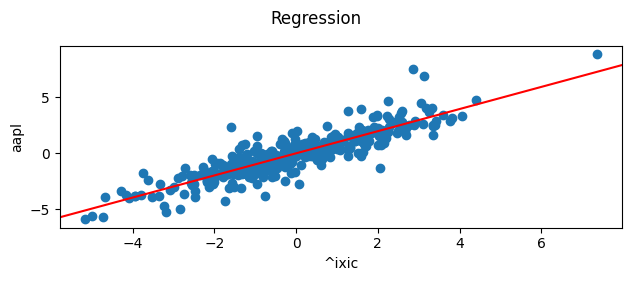

In [7]:
def simulation_reg(name_of_stock,reference_index='^ixic'):
    """
    A function that performs a simulation of regression analysis for a given stock and reference index.
    It calculates the beta and R-squared values and visualizes the relationship using a CCPR plot.

    Parameters:
        name_of_stock (str): The stock name or ticker symbol.
        reference_index (str): The reference index. Default is '^ixic' (Nasdaq index).

    Returns:
        pandas.DataFrame: A DataFrame containing the beta and R-squared values.

    Comments:
        - The function internally calls the 'adjust' function to retrieve stock data.
        - The CCPR plot is adjusted to highlight the stock data line in red.
    """
    y=adjust(name_of_stock)# get data of the stock and assign it to the variable y
    x=adjust(reference_index)# get data of the stock index and assign it to the variable x

    reg_df=pd.DataFrame([y,x],index=[name_of_stock,'^ixic']).T # create a df
    reg_df=sm.add_constant(reg_df,prepend=False)# add constant to df
    mod=sm.OLS(reg_df[name_of_stock],reg_df[reg_df.columns[1:]])
    res=mod.fit()

    result=pd.DataFrame([[res.params[0],res.rsquared]],columns=['Beta','R_squared'],index=[name_of_stock.upper()]).round(3) # assign Beta and 'R_squared' in data frame
    'adjust the plot'

    fig=sm.graphics.plot_ccpr_grid(res)
    fig.tight_layout(pad=1.0)
    fig.axes[0].set_ylabel(f'{name_of_stock}')
    fig.axes[0].get_lines()[1].set_color('red')


    fig.suptitle('Regression')

    return result
simulation_reg('aapl')
